# Unit 5 - Financial Planning

In [55]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [5]:
# Load .env enviroment variables
load_dotenv()


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [13]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = my_btc * btc_data['data']['1']['quotes']['CAD']['price']
my_eth_value = my_eth * eth_data['data']['1027']['quotes']['CAD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43110.64
The current value of your 5.3 ETH is $12425.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
# Set Alpaca API key and secret
# Load Alpaca keys required by the APIs
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [29]:
# Format current date as ISO format
today = pd.Timestamp('2023-06-16',tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
response = alpaca_api.get_bars(
    tickers,
    timeframe,
    start = today
).df

response
# Reorganize the DataFrame
# Separate ticker data
agg_df = response.loc[response['symbol']=='AGG']
spy_df = response.loc[response['symbol']=='SPY']

# Concatenate the ticker DataFrames
invest_df = pd.concat([agg_df,spy_df],axis=1,join='inner',keys=['AGG','SPY'])

# Preview DataFrame
invest_df

AGG                                              \
                            open    high     low  close   volume trade_count   
timestamp                                                                      
2023-06-16 04:00:00+00:00  98.09  98.275  97.905  98.14  4599777       26718   

                                                SPY                            \
                                vwap symbol    open      high     low   close   
timestamp                                                                       
2023-06-16 04:00:00+00:00  98.118495    AGG  443.02  443.6078  438.97  439.46   

                                                                     
                              volume trade_count        vwap symbol  
timestamp                                                            
2023-06-16 04:00:00+00:00  110461387      619074  440.999282    SPY

In [37]:
# Pick AGG and SPY close prices
agg_close_price = invest_df['AGG']['close'].values[0]
spy_close_price = invest_df['SPY']['close'].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.14
Current SPY closing price: $439.46


In [38]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21973.00
The current value of your 200 AGG shares is $19628.00


### Savings Health Analysis

In [44]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = round(my_btc_value + my_eth_value, 2)
shares = round(my_spy_value + my_agg_value, 2)

# Create savings DataFrame
df_savings = pd.DataFrame({'amount':[crypto, shares]},index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,55536.05
shares,41601.00


array([<Axes: ylabel='amount'>], dtype=object)

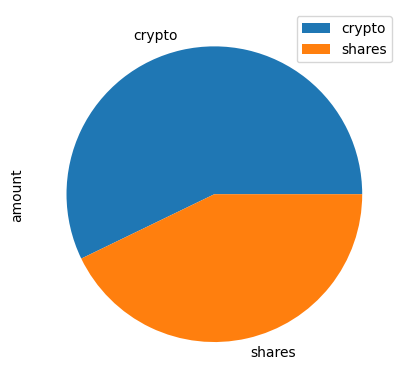

In [42]:
# Plot savings pie chart
df_savings.plot(kind='pie',subplots=True)

In [48]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = round(crypto + shares,2)

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congrats! You are in good financial health.')
elif total_savings == emergency_fund:
    print(f'Congrats! You have reached your saving goal.')
else:
    print(f'You are ${round(emergency_fund-total_savings,2)} short from your saving goal.')

Congrats! You are in good financial health.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [49]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-06-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-16', tz='America/New_York').isoformat()

In [54]:
# Get 5 years' worth of historical data for SPY and AGG
data_5years = alpaca_api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
agg_df = data_5years.loc[data_5years['symbol']=='AGG']
spy_df = data_5years.loc[data_5years['symbol']=='SPY']

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_df,spy_df],axis=1,join="inner",keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2019-06-17 04:00:00+00:00  110.52  110.595  110.460  110.54  3312647   
2019-06-18 04:00:00+00:00  110.94  110.970  110.710  110.84  3640299   
2019-06-19 04:00:00+00:00  110.71  111.220  110.645  111.22  2896140   
2019-06-20 04:00:00+00:00  111.39  111.567  111.335  111.41  4224311   
2019-06-21 04:00:00+00:00  111.22  111.260  111.040  111.12  4640233   

                                                             SPY            \
                          trade_count        vwap symbol    open      high   
timestamp                                                                    
2019-06-17 04:00:00+00:00       10669  110.546749    AGG  289.52  290.2200   
2019-06-18 04:00:00+00:00       17085  110.805686    AGG  291.38  293.5700   
2019-06-19 04:00:00+00:00       12892  110.936898    AGG  292.55  293.6500   
2019-06-20 04:00:00+00:00       14296  111.428452    AGG  296.04  296.3093   
2019-06-21 04:00:00+00:00       15666  111.101493    AGG  294.13  295.5200   

                                                                    \
                                low   close     volume trade_count   
timestamp                                                            
2019-06-17 04:00:00+00:00  289.1800  289.47   39205709      194956   
2019-06-18 04:00:00+00:00  290.9900  292.32   85469823      387216   
2019-06-19 04:00:00+00:00  291.4700  293.01   80323977      339731   
2019-06-20 04:00:00+00:00  293.1255  295.88  117760417      369798   
2019-06-21 04:00:00+00:00  293.7600  294.00   85099241      291151   

                                              
                                 vwap symbol  
timestamp                                     
2019-06-17 04:00:00+00:00  289.675094    SPY  
2019-06-18 04:00:00+00:00  292.242582    SPY  
2019-06-19 04:00:00+00:00  292.685169    SPY  
2019-06-20 04:00:00+00:00  295.307119    SPY  
2019-06-21 04:00:00+00:00  294.338918    SPY

In [70]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [71]:
# Printing the simulation input data
MC_30years.portfolio_data

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2019-06-17 04:00:00+00:00  110.52  110.595  110.4600  110.54  3312647   
2019-06-18 04:00:00+00:00  110.94  110.970  110.7100  110.84  3640299   
2019-06-19 04:00:00+00:00  110.71  111.220  110.6450  111.22  2896140   
2019-06-20 04:00:00+00:00  111.39  111.567  111.3350  111.41  4224311   
2019-06-21 04:00:00+00:00  111.22  111.260  111.0400  111.12  4640233   
...                           ...      ...       ...     ...      ...   
2023-06-12 04:00:00+00:00   98.09   98.160   97.7300   98.14  5436273   
2023-06-13 04:00:00+00:00   98.48   98.480   97.6001   97.68  9568596   
2023-06-14 04:00:00+00:00   97.88   97.990   97.4499   97.77  8360159   
2023-06-15 04:00:00+00:00   98.29   98.460   98.1337   98.45  7471994   
2023-06-16 04:00:00+00:00   98.09   98.275   97.9050   98.14  4599777   

                                                                          SPY  \
                          trade_count        vwap symbol daily_return    open   
timestamp                                                                       
2019-06-17 04:00:00+00:00       10669  110.546749    AGG          NaN  289.52   
2019-06-18 04:00:00+00:00       17085  110.805686    AGG     0.002714  291.38   
2019-06-19 04:00:00+00:00       12892  110.936898    AGG     0.003428  292.55   
2019-06-20 04:00:00+00:00       14296  111.428452    AGG     0.001708  296.04   
2019-06-21 04:00:00+00:00       15666  111.101493    AGG    -0.002603  294.13   
...                               ...         ...    ...          ...     ...   
2023-06-12 04:00:00+00:00       24139   97.959299    AGG     0.001735  430.92   
2023-06-13 04:00:00+00:00       27973   97.819261    AGG    -0.004687  435.32   
2023-06-14 04:00:00+00:00       36242   97.793308    AGG     0.000921  437.01   
2023-06-15 04:00:00+00:00       29262   98.355119    AGG     0.006955  436.33   
2023-06-16 04:00:00+00:00       26718   98.118495    AGG    -0.003149  443.02   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2019-06-17 04:00:00+00:00  290.2200  289.1800  289.47   39205709      194956   
2019-06-18 04:00:00+00:00  293.5700  290.9900  292.32   85469823      387216   
2019-06-19 04:00:00+00:00  293.6500  291.4700  293.01   80323977      339731   
2019-06-20 04:00:00+00:00  296.3093  293.1255  295.88  117760417      369798   
2019-06-21 04:00:00+00:00  295.5200  293.7600  294.00   85099241      291151   
...                             ...       ...     ...        ...         ...   
2023-06-12 04:00:00+00:00  433.8800  430.1700  433.80   76272808      523670   
2023-06-13 04:00:00+00:00  437.3300  434.6300  436.66   95912772      673273   
2023-06-14 04:00:00+00:00  439.0612  433.5900  437.18  100625477      712664   
2023-06-15 04:00:00+00:00  443.9000  436.2300  442.60  110301302      748180   
2023-06-16 04:00:00+00:00  443.6078  438.9700  439.46  110461387      619074   

                                                           
                                 vwap symbol daily_return  
timestamp                                                  
2019-06-17 04:00:00+00:00  289.675094    SPY          NaN  
2019-06-18 04:00:00+00:00  292.242582    SPY     0.009846  
2019-06-19 04:00:00+00:00  292.685169    SPY     0.002360  
2019-06-20 04:00:00+00:00  295.307119    SPY     0.009795  
2019-06-21 04:00:00+00:00  294.338918    SPY    -0.006354  
...                               ...    ...          ...  
2023-06-12 04:00:00+00:00  431.957032    SPY     0.009072  
2023-06-13 04:00:00+00:00  436.003879    SPY     0.006593  
2023-06-14 04:00:00+00:00  436.725442    SPY     0.001191  
2023-06-15 04:00:00+00:00  440.

In [72]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989609,0.995917,1.014928,1.013364,1.001718,0.998688,0.995896,0.997449,0.993109,0.993306,...,0.998992,1.000353,0.982822,1.005618,0.992619,1.006097,0.998039,1.002061,0.994026,0.989614
2,0.988802,0.980350,1.006817,1.009604,1.017502,0.986060,0.986157,0.981195,0.987954,0.999158,...,0.989035,1.012599,0.972370,1.003446,0.990039,1.008309,0.991038,1.014510,0.996590,0.976823
3,0.999111,0.986477,1.000767,1.001141,1.024076,0.992392,0.995750,0.983429,0.991245,0.989768,...,0.981210,1.022400,0.966220,1.011416,0.989582,1.011404,0.992070,1.013295,0.989594,0.983439
4,1.005529,0.981426,0.996639,0.994462,1.017724,0.997759,0.994585,0.979171,0.980695,0.996583,...,0.970352,1.022642,0.963752,1.024291,0.983558,1.018357,1.002126,1.013550,0.991279,0.987075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.040743,4.658930,4.069195,19.423816,4.098096,3.166934,11.486887,5.387545,5.168213,2.808512,...,1.668666,8.020045,6.526372,5.531833,5.144759,28.186697,8.762876,2.828319,1.278850,6.074278
7557,3.071171,4.693641,4.043977,19.262065,4.089412,3.139171,11.530925,5.493188,5.101078,2.802245,...,1.670849,8.047961,6.576612,5.513591,5.087754,27.809938,8.854419,2.845376,1.258108,6.110723
7558,3.069463,4.702738,4.008059,19.493130,4.116919,3.172881,11.583430,5.511323,5.028888,2.795670,...,1.691898,8.090489,6.613770,5.515639,5.001179,28.340908,8.780707,2.878701,1.266680,6.069870
7559,3.068447,4.761366,3.980077,19.187799,4.186691,3.181747,11.531456,5.436529,5.079649,2.759824,...,1.703709,8.054523,6.569855,5.531644,5.063351,27.824052,8.910564,2.876544,1.263233,6.134030


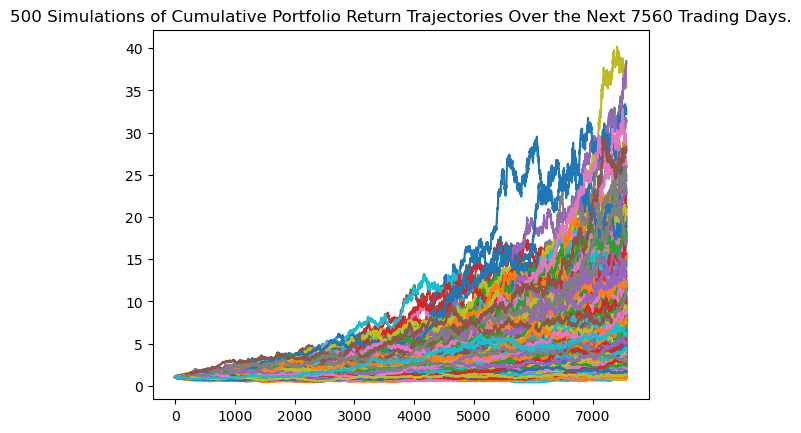

In [73]:
# Plot simulation outcomes
line_plot = MC_30years.plot_simulation()


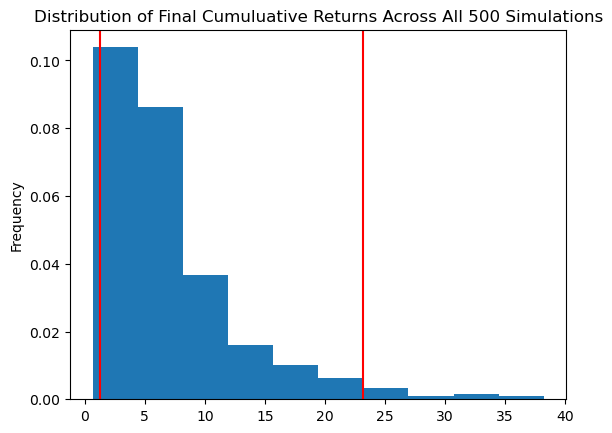

In [74]:
# Plot probability distribution and confidence intervals
disctribution_plot = MC_30years.plot_distribution()

### Retirement Analysis

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_30years.summarize_cumulative_return()

# Print summary statistics
summary

count           500.000000
mean              7.163757
std               5.817444
min               0.669686
25%               3.200502
50%               5.326959
75%               9.103469
max              38.214028
95% CI Lower      1.291372
95% CI Upper     23.202596
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [76]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(initial_investment*summary[8],2)
ci_upper = round(initial_investment*summary[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $25827.43 and $464051.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [77]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(initial_investment*summary[8],2)
ci_upper = round(initial_investment*summary[9],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $38741.15 and $696077.89


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [78]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [79]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004967,1.008938,0.994177,0.992720,0.990162,1.016662,1.003969,0.991198,0.989217,0.967165,...,1.012434,1.007135,1.015785,1.002996,1.006767,1.006666,0.993987,1.001505,1.012426,1.003609
2,1.007633,1.008727,0.991573,0.964534,1.000961,1.019012,1.005092,0.985735,0.987889,0.981346,...,1.024130,1.012842,1.025041,1.022088,1.008353,1.016709,1.005257,0.986251,0.995807,1.007605
3,1.006610,1.012692,1.015444,0.966603,0.992769,1.007801,1.004277,0.995782,0.987209,0.986098,...,1.003705,1.004981,1.024304,1.030972,0.988799,1.011746,1.017289,1.002419,0.989846,1.020765
4,1.008857,1.013703,1.010053,0.972232,0.993470,1.030025,1.006267,0.999048,0.961060,0.980762,...,1.000746,1.016326,1.008845,1.053935,0.990046,1.036522,1.015199,1.018440,0.991418,1.011859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.634907,1.638051,1.065597,1.333710,2.597025,3.943451,1.260272,1.632743,2.888273,2.201906,...,1.537341,0.848623,0.722898,0.920347,1.788263,1.877744,2.339747,1.221613,1.214575,2.947268
1257,1.638282,1.666282,1.049001,1.336207,2.596522,3.971078,1.282022,1.642820,2.821838,2.207747,...,1.520013,0.851448,0.720411,0.922638,1.806063,1.897718,2.342091,1.208265,1.199811,2.973258
1258,1.637679,1.669461,1.031077,1.332681,2.661053,4.016394,1.266304,1.670407,2.813967,2.262725,...,1.537954,0.874485,0.711698,0.899182,1.833318,1.855990,2.379149,1.186158,1.183447,2.943205
1259,1.663323,1.660132,1.039576,1.323249,2.645277,3.951019,1.264024,1.670300,2.825525,2.272764,...,1.512754,0.889666,0.714063,0.918745,1.855305,1.895883,2.438725,1.173595,1.197487,2.931698


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

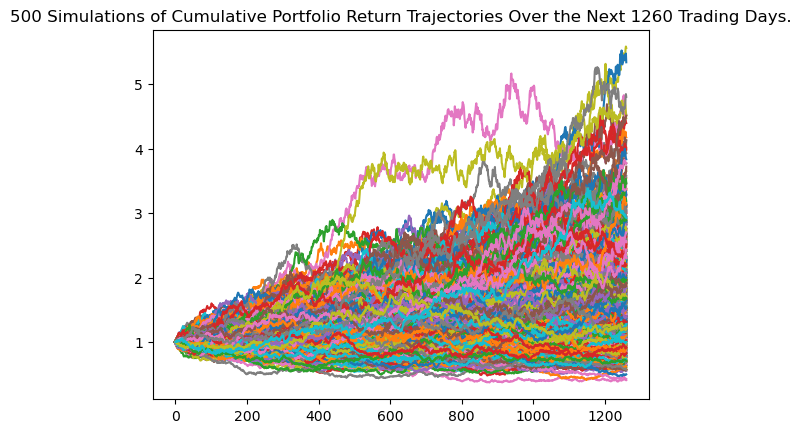

In [80]:
# Plot simulation outcomes
MC_5years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

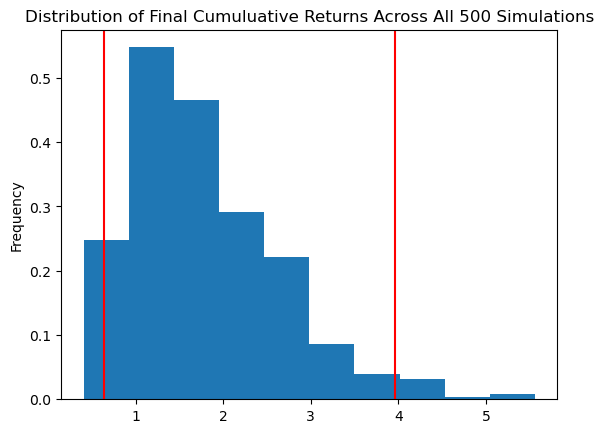

In [81]:
# Plot probability distribution and confidence intervals
MC_5years.plot_distribution()

In [82]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_5y = MC_5years.summarize_cumulative_return()

# Print summary statistics
sum_5y

count           500.000000
mean              1.789251
std               0.845513
min               0.409795
25%               1.172563
50%               1.627264
75%               2.250307
max               5.558999
95% CI Lower      0.643174
95% CI Upper      3.958060
Name: 1260, dtype: float64

In [83]:
# Set initial investment
initial_investment = 200000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = sum_5y[8]*initial_investment
ci_upper_five = sum_5y[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $200000 in the portfolio over the next 5 years will end within in the range of $128634.84510166048 and $791611.9601705304


### Ten Years Retirement Option

In [85]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [86]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983544,1.000750,1.009283,1.008212,1.014007,0.999144,1.009683,1.004018,0.994654,1.002528,...,1.013936,1.011655,1.002117,1.006146,0.995541,1.009736,1.004272,0.983127,0.996757,0.998182
2,0.992004,1.005861,1.008023,1.011877,1.018758,0.995601,0.997006,1.002904,1.010627,1.000158,...,1.016621,1.031133,1.006401,0.982779,0.987300,1.014613,0.982913,0.944004,1.008465,1.022992
3,1.001159,0.986202,1.008291,1.004881,1.019446,0.988516,0.996297,1.022010,1.008833,1.013306,...,1.016689,1.025381,0.994406,0.967542,0.985686,1.022255,0.989794,0.935669,1.010647,1.018198
4,1.016775,0.997880,1.003997,1.005321,1.021318,0.977374,1.003913,1.026890,1.007971,1.024075,...,1.003393,1.033101,0.988809,0.964599,0.950561,1.024079,0.999590,0.937020,1.026946,1.013729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.436673,3.054737,2.952071,1.455566,1.527585,3.222995,3.991993,0.534344,2.433803,2.279903,...,1.814280,1.481950,3.292672,3.802300,2.853763,3.354988,4.274096,9.027002,3.753192,1.521775
2517,1.452214,3.032064,3.000060,1.483416,1.557686,3.307932,4.064562,0.538401,2.485336,2.262812,...,1.816374,1.507674,3.330051,3.744172,2.790093,3.334722,4.335297,8.951785,3.787971,1.514062
2518,1.443200,3.002099,3.014818,1.506194,1.571000,3.332678,4.027541,0.527124,2.480078,2.302765,...,1.786624,1.511449,3.351804,3.733669,2.784511,3.297898,4.242046,9.064241,3.855524,1.537181
2519,1.459731,3.053002,2.965994,1.495410,1.567525,3.277712,4.077769,0.531953,2.465576,2.264262,...,1.774718,1.523831,3.413096,3.681558,2.826852,3.304968,4.274309,8.992253,3.895161,1.503130


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

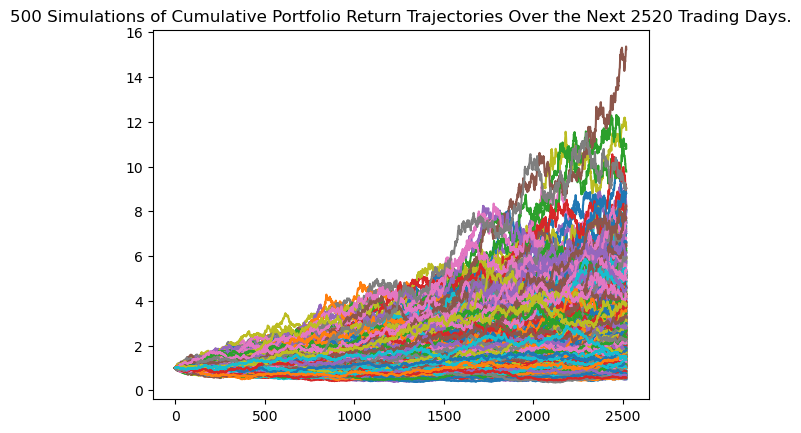

In [87]:
# Plot simulation outcomes
MC_10years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

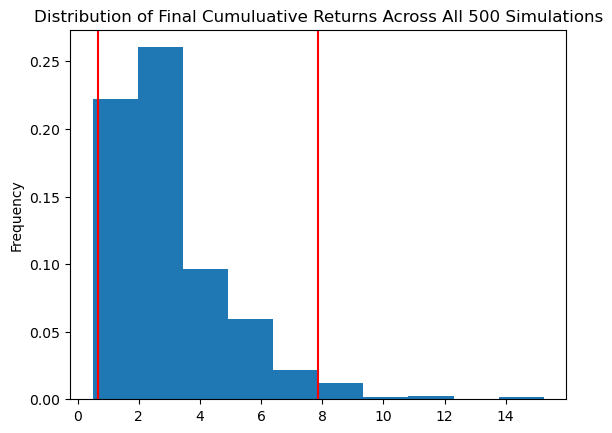

In [88]:
# Plot probability distribution and confidence intervals
MC_10years.plot_distribution()

In [89]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_10y = MC_10years.summarize_cumulative_return()

# Print summary statistics
sum_10y

count           500.000000
mean              2.981850
std               1.885545
min               0.494504
25%               1.627304
50%               2.570571
75%               3.751455
max              15.240944
95% CI Lower      0.672924
95% CI Upper      7.859942
Name: 2520, dtype: float64

In [90]:
# Set initial investment
initial_investment = 200000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = initial_investment * sum_10y[8]
ci_upper_ten = initial_investment * sum_10y[9]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $200000 in the portfolio over the next 10 years will end within in the range of $134584.72904995785 and $1571988.499607671
